In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import re

### Week 1 error propagation

In [55]:
# something to convert to table for latex easy from csv or tsv

def convert_to_latex(inp, sep):
    '''
    Function to create a table from inputted values separated by sep variable 
    (varible must be character escapted like \t for tab-separated), or just ',' for csv
    Input: inp = input string, full input string, sep = separator value
    '''
    ###### input #######
    #### format is: value \t error \t value \t error (etc)
    ####################
    output = ""
    out = re.split(fr'{sep}+', inp.rstrip(f'{sep}'))
    #print(out)
    c=0
    for i in range(0,int(len(out)/2)):
        iout = f'${out[c]}\pm{out[c+1]}$&'
        output+=iout
        c+=2
    return output
    
'''
conv_data = [['10	0.5'],
             ['32.5	0.5'],
             ['54	0.5'],
             ['78	0.5'],
             ['101.5	0.5'],
             [
                 
'''
conv_data = '''16.3	0.5
50	0.5
84.7	0.5
	
	
	
10	0.5
32.5	0.5
54	0.5
78	0.5
101.5	0.5
	
7	0.5
23.5	0.5
42	0.5
58	0.5
76	0.5
	
5.5	0.5
19	0.5
33.5	0.5
47.2	0.5
60.5	0.5'''
lines = conv_data.split("\n")
for i in lines:
    print(convert_to_latex(i,'\t'))


$16.3\pm0.5$&
$50\pm0.5$&
$84.7\pm0.5$&



$10\pm0.5$&
$32.5\pm0.5$&
$54\pm0.5$&
$78\pm0.5$&
$101.5\pm0.5$&

$7\pm0.5$&
$23.5\pm0.5$&
$42\pm0.5$&
$58\pm0.5$&
$76\pm0.5$&

$5.5\pm0.5$&
$19\pm0.5$&
$33.5\pm0.5$&
$47.2\pm0.5$&
$60.5\pm0.5$&


In [52]:
data = np.zeros((8,6))
# format is Frequency (Hz),	dF,	Mass (on end),	Wavelength (cm),	dW	,v (cm/s)

data[0:8] = [[11.8,0.1,100,381.4,0.05,4500.52], # 1st
            [17.6,0.1,250,400,0.05,7040],   # first harmonic (1/2 wavelength)
             [21.8,0.1,100,203.4,0.05,4434.12], # 2nd
             [34,0.1,250,216.2,0.05,7350.8], # 2nd harmonic (1 full wavelength)
             [33,0.1,100,145.8,0.05,4811.4], # 3rd
             [49.1,0.1,250,149.1,0.05,7320.81], # 3rd (1.5 wavelength)
             [52.3,0.1,100,87.1,0.05,4555.33], # 4th
             [64.9,0.1,250,111.4,0.05,7229.86]] # 4th (2 full wavelength)
             
# calculating uncertainties

# if v = wv*freq, then dv = v*sqrt((delwv/wv)**2+(delfreq/freq)**2)

delVs = np.zeros(8)
data/=100.
print('Calculation for Week 1 Results --- Velocity (cm/s)')
for i in range(0,len(data[:,0])):
    freq = data[i,0] # in Hz
    delfreq = data[i,1] # in hz
    wv = data[i,3] # in cm
    delwv = data[i,4] # in cm
    
    v = data[i,5] # in cm/s
    delVs[i] = v*np.sqrt((delwv/wv)**2+(delfreq/freq)**2)

    print(f'${v:.3g}\pm{delVs[i]:.2g}$')
    
vel_1_vals = [data[0,5],data[2,5],data[4,5],data[6,5]]
vel_25_vals = [data[1,5],data[3,5],data[5,5],data[7,5]]
print("One Calc of V 100g (mean and stdev)----")
vel_1_mean = np.mean(vel_1_vals)
del_1_mean = np.std(vel_1_vals)
print(f'${vel_1_mean:.3g}\pm{del_1_mean:.2g}$')
print("One Calc of V 250g (mean and stdev)----")
vel_25_mean = np.mean(vel_25_vals)
del_25_mean = np.std(vel_25_vals)
print(f'${vel_25_mean:.3g}\pm{del_25_mean:.2g}$')


### theoretical prediction uncertainty

#0.1	40.35229476
#0.25	63.80258013
t_1 = 40.35229476
t_25 = 63.80258013

#2.16	0.0005	0.0013	0.0001
leng = 2.16
dleng = 0.0005
m = 0.0013
dm = 0.0001
u = leng*m
# formula is involving sqrt and division, so we need exponent combination and multiplication combination for uncertainty
uerr = (u*np.sqrt((dleng/leng)**2+(dm/m)**2))
# now exponent uncertainty (assuming no uncertainty for Tension part (T), so sqrt(T/u)

vel_1_err = np.sqrt((0.1*9.8/u))*0.5*(uerr*1/u)
print(vel_1_err)
vel_25_err = np.sqrt((0.25*9.8/u))*0.5*(uerr*1/u)
print(vel_25_err)

Calculation for Week 1 Results --- Velocity (cm/s)
$45\pm0.38$
$70.4\pm0.4$
$44.3\pm0.2$
$73.5\pm0.22$
$48.1\pm0.15$
$73.2\pm0.15$
$45.6\pm0.091$
$72.3\pm0.12$
One Calc of V 100g (mean and stdev)----
$45.8\pm1.4$
One Calc of V 250g (mean and stdev)----
$72.4\pm1.2$
0.7185270204134899
1.1360909724404642


### Week 2 Error Propagation


##### Define fit function

In [4]:
def StraightLine(x, m, c):
    y = m * x + c
    return y

##### Perform fit

##### Extract fit parameters and compute chi-squared
##### & plot fits along with error bars

In [60]:
def do_fit(Lmeas,dLmeas,mode,freq):
    '''
    Do a fit and plot the graphs (with error bars) given Lmeas (measurements array), dLmeas (uncertainties array), mode (modes array), and freq (frequency data was taken at)
    '''
    line, cov = curve_fit(StraightLine, mode, Lmeas, sigma=dLmeas, absolute_sigma=True)
    m = line[0]
    c = line[1]
    error_m = np.sqrt(cov[0,0])
    error_c = np.sqrt(cov[1,1])
    # Compute chi-squared
    Lfit = StraightLine(mode, *line)
    chisq = ((Lmeas-Lfit)/dLmeas)**2
    print(f'Chi-squared: {chisq.sum():.2f},  Number of degrees of freedom: {len(Lmeas)-2}')
    print(f'Reduced chi-squared: {chisq.sum()/(len(Lmeas)-2):.3f}')
    print(f'The slope is {m:.5f} +/- {error_m:.5f} m')
    print(f'The intercept is {c:.4f} +/- {error_c:.4f} m')

    # new code from template (might have to adjust this to m instead of cm)
    wavelength = m*4
    vel = freq*wavelength
    dWv = 0.5/100.
    dVel = np.sqrt((error_m/m)**2+(dWv/wavelength)**2)
    print(f'Velocity estimate: {vel} +/- {dVel} m/s')
    Terr = 0.8
    T = 297.8
    vel_est = 20.1*np.sqrt(T)
    dVelest = vel_est*0.5*(Terr/T)
    print(f'Velocity from formula (20.1*sqrt(T)): {vel_est} +/- {dVelest} m/s')
    ##########
    
    plt.figure(figsize=(10, 6))
    plt.rc('font', size=18)

    # Set boundaries for the 2-D scatter plot with error bars
    xstart = 0
    xstop  = 10
    plt.xlim(xstart, xstop)
    plt.ylim(-0.05, 1)

    # Plot the data
    plt.errorbar(mode, Lmeas, yerr=dLmeas, fmt='bo')

    # Compute best-fit values
    xvalues = np.linspace(xstart, xstop, 100)
    yvalues_fit = StraightLine(xvalues, *line)

    # Plot the fit results
    plt.plot(xvalues, yvalues_fit, label=f'f = {freq} Hz')
    plt.legend(fontsize=20)

    # Add title and axis labels
    plt.title('Standing sound waves')
    plt.xlabel('Resonance mode m')
    plt.ylabel('Air column length (m)')
    plt.ylim(0, 1.2)
    ylines = np.array([0.00, 0.20, 0.40, 0.60, 0.80, 1.00])
    plt.hlines(ylines, xmin=xstart, xmax=xstop, linestyle='dotted', linewidth=0.5, color='green')

    plt.savefig(f'{freq}-hz-plot.png')
    
    # Compute residuals, i.e. difference between the measured lengths and the best-fit lengths
    Lres = Lmeas - Lfit

    # Plot the residuals
    plt.figure(figsize=(8, 5))
    plt.xlim(xstart, xstop)
    plt.ylim(-.015, .015)
    plt.errorbar(mode, Lres, yerr=dLmeas, fmt='bo')
    plt.rc('font', size=12)
    plt.title(fr'Fit residuals (f = {freq} Hz) ($\chi^2_{{reduced}}$={chisq.sum()/(len(Lmeas)-2):.3f})')
    plt.xlabel('Resonance mode m')
    plt.ylabel('$L_{meas}$ - $L_{fit}$ (m)')
    plt.axhline(y=0.0, color='g', linestyle='--')
    plt.savefig(f'{freq}-hz-residuals.png')

Chi-squared: 0.67,  Number of degrees of freedom: 1
Reduced chi-squared: 0.667
The slope is 0.17100 +/- 0.00177 m
The intercept is -0.0097 +/- 0.0060 m
Velocity estimate: 342.00000002723164 +/- 0.012661190062343989 m/s
Velocity from formula (20.1*sqrt(T)): 346.86334196625626 +/- 0.46590106375588486 m/s
-------------

Chi-squared: 8.30,  Number of degrees of freedom: 3
Reduced chi-squared: 2.767
The slope is 0.11425 +/- 0.00079 m
The intercept is -0.0193 +/- 0.0045 m
Velocity estimate: 342.74999999420453 +/- 0.01294547053673367 m/s
Velocity from formula (20.1*sqrt(T)): 346.86334196625626 +/- 0.46590106375588486 m/s
-------------

Chi-squared: 4.70,  Number of degrees of freedom: 3
Reduced chi-squared: 1.567
The slope is 0.08625 +/- 0.00079 m
The intercept is -0.0183 +/- 0.0045 m
Velocity estimate: 345.00000035721973 +/- 0.017148058091465357 m/s
Velocity from formula (20.1*sqrt(T)): 346.86334196625626 +/- 0.46590106375588486 m/s
-------------

Chi-squared: 1.47,  Number of degrees of fre

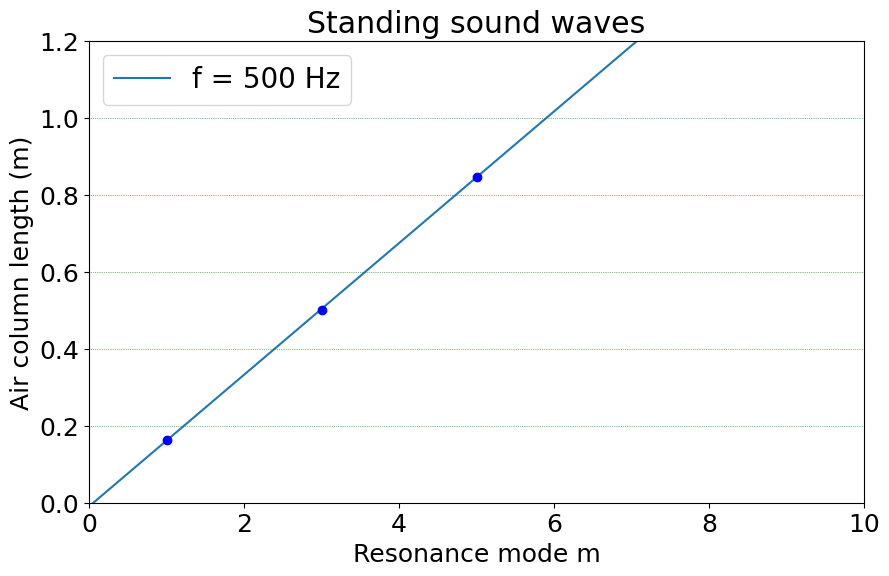

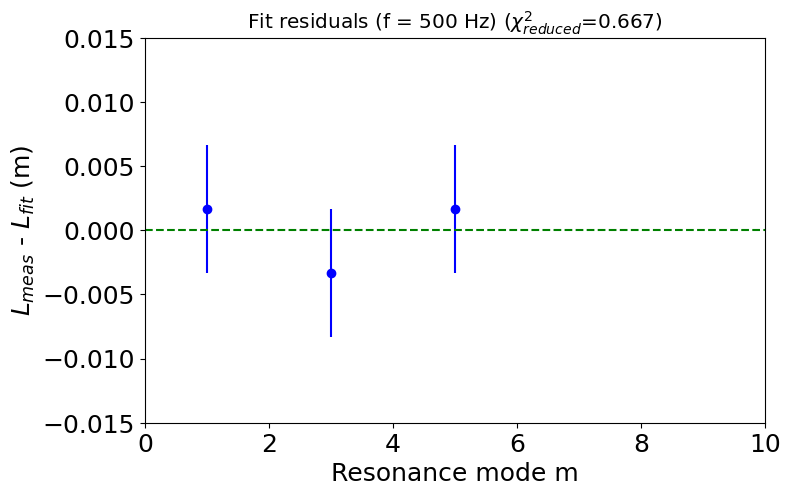

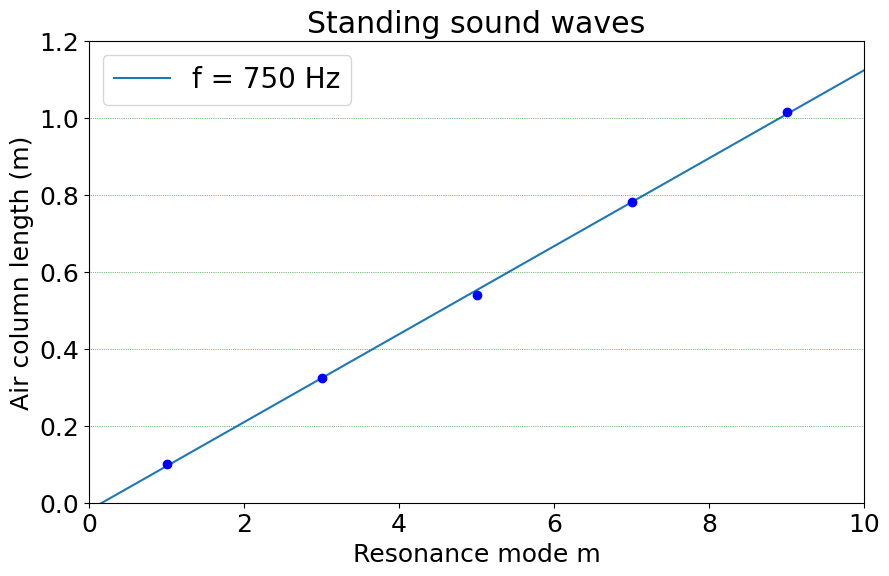

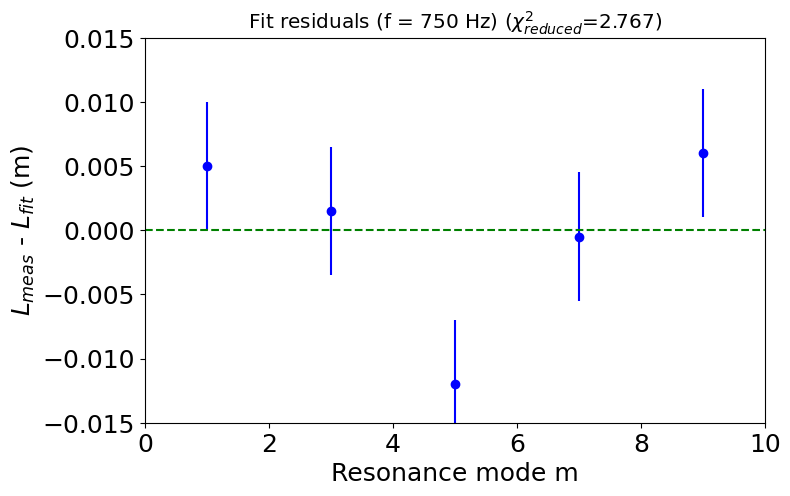

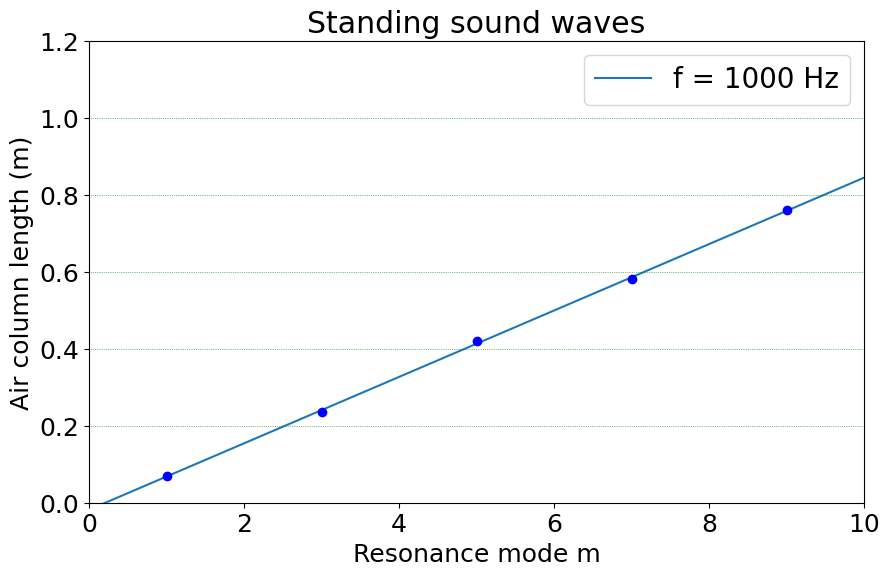

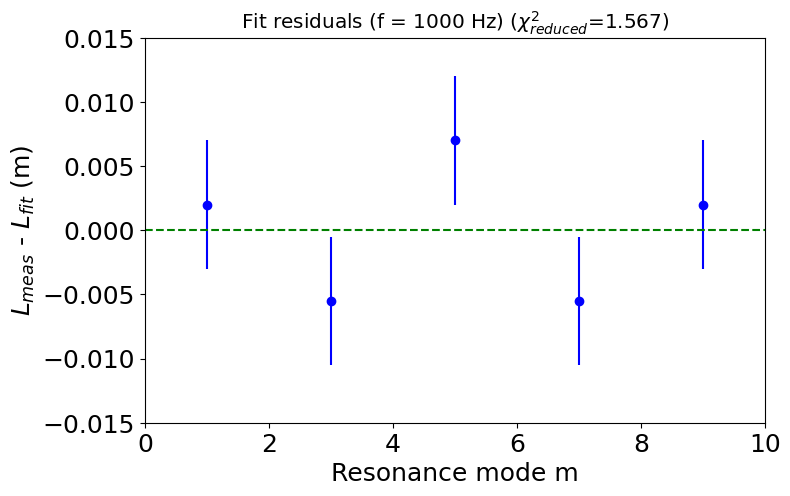

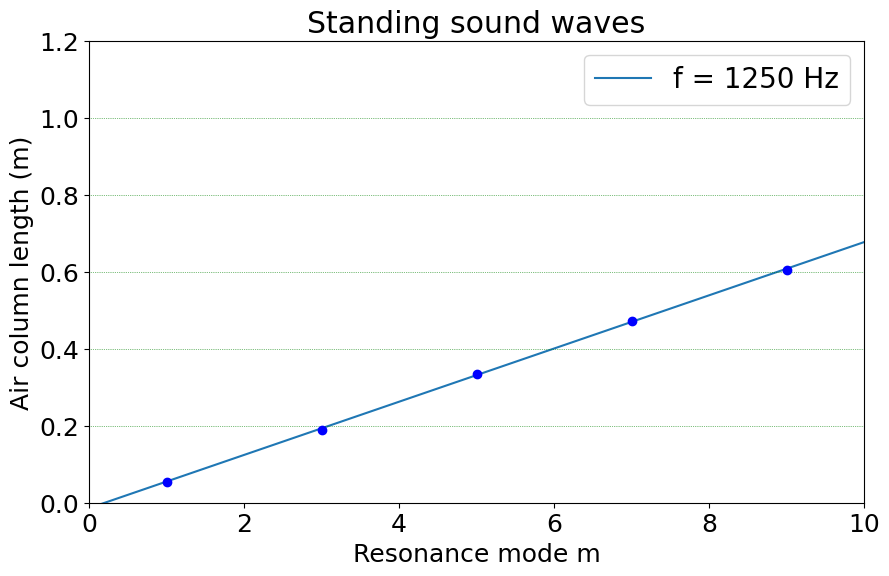

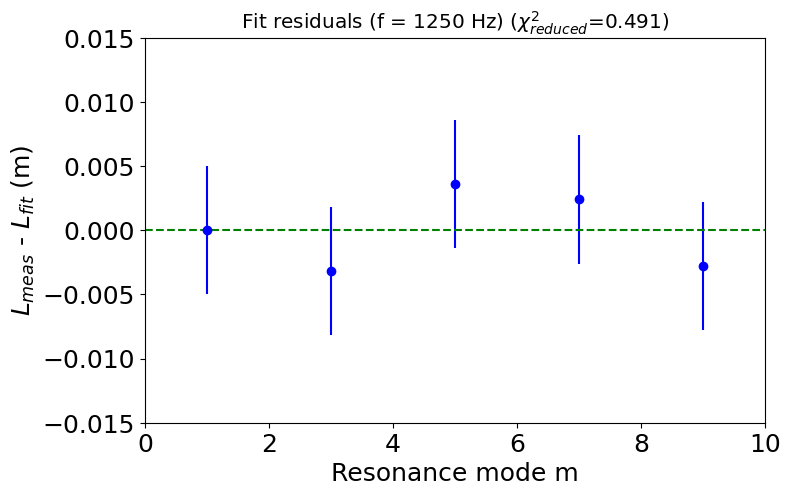

In [61]:
# Resonance mode
#mode = np.array([1,3,5,7,9])
# Length measurement (in meters)
mode1 = np.array([1,3,5])
Lmeas1 = np.array([.163,.50,.847])  # 500 Hz
#Lmeas_750 = np.array([.10, .325, .54, .78, 1.015])
# Length measurement uncertainty (in meters)
dLmeas1 = np.full(len(Lmeas1),0.005)



modes = np.array([1,3,5,7,9])
## Calculate fits and plots for each freq run
data = np.array([[16.3,50,84.7,0,0], # 500 Hz
                 [10,32.5,54,78,101.5], # 750 Hz
                 [7,23.5,42,58,76], # 1000 Hz
                 [5.5,19,33.5,47.2,60.5]]) # 1250 Hz
          
freq = np.array([500,750,1000,1250]) # frequencies (Hz) corresponding to rows in data array
# adjust to go from length (cm) to length (m)
data /= 100.

uncert = 0.5/100.
# make uncertainties array
ddata = np.full((len(data),len(data[0,:])),uncert)

for i in range(0,len(data[:,0])):
    # change mode for first case bc not enough data (point to note for report)
    if(i==0):
        do_fit(data[i,0:3],ddata[i,0:3],modes[0:3],freq[i])
    else:
    # otherwise do a normal fit with all 1-9 modes
        do_fit(data[i],ddata[i],modes,freq[i])
    print('-------------\n')
    


In [71]:
## now data analysis with sigma to find agreement levels

def do_sig(val1,valerr1,val2,valerr2):
    '''
    Find sigma of 2 values (see if 2 values are in agreement or not)
    - Anything $\sigma<1.0$ is in agreemnt
    - 1<sigma<2 is a gray area
    - sigma>3.0 the values do not agree
    '''
    uncer = np.sqrt((valerr1**2)+(valerr2**2))
    diff = np.absolute(val1-val2)
    return (diff/uncer)

goal = 345.89
goalerr = 1

# want to find sigma for each velocity value calculated
vel500 = 342
vel500err = 0.013
vel750 = 342
vel750err = 0.013
vel1000 = 345
vel1000err = 0.017
vel1250 = 346
vel1250err = 0.021
veltheory = 346
veltheoryerr = 0.47

dat = np.array([vel500,vel500err,vel750,vel750err,vel1000,vel1000err,vel1250,vel1250err,veltheory,veltheoryerr])
c=0
for i in range(int(len(dat)/2)):
    print(do_sig(dat[c],dat[c+1],goal,goalerr))
    c+=2
    
    
    
#45.8 ± 1.4 
#250 72.4 ± 1.2 
#100 40.4 ± 0.72
#250 64.8 ± 1.1

print(do_sig(45.8,1.4,40.4,.72))
print(do_sig(72.4,1.2,64.8,1.1))

3.889671336657478
3.889671336657478
0.8898714228684085
0.10997575301940783
0.09955260719249397
3.4301100946557095
4.6686428879380335
